In [2]:
from IPython.display import Image

# Data Preprocessing with scikit-learn

## Introduction
### ML engineering vs. data science
Il compito principale degli ingegneri di Machine Learning è quello di analizzare prima i dati per le tendenze praticabili, quindi creare una pipeline di input efficiente per il training di un modello. <br> Per far ciò si fa uso delle librerie di `NumPy` e `Pandas`.<br><br>
Mentre `NumPy` e `Pandas` sono utilizzate in Data Manipolation, la sezione `Data Preprocessing` utilizzerà `scikit/learn`.
<br><br> I data scientist tendono a lavorare su set di dati più piccoli rispetto agli ingegneri di Machine Learning e il loro obiettivo principale è analizzare i dati ed estrarre rapidamente risultati utilizzabili. Pertanto, si concentrano maggiormente sui modelli di inferenza dei dati tradizionali (trovati in scikit-learn), piuttosto che sulle reti neurali profonde.

## Standardizing Data
### Standard data format
I dati possono contenere tutti i tipi di valori diversi. Es:
- i tempi di sprint olimpici dei 100 metri andrano da 9,5 a 10,5 secondi,
- mentre il conteggio delle calorie può variare da 1500 a 3000 calorie.
- Anche i dati che misurano le stesse quantità possono variare in valore (peso in kg, o in libbre)

Quando i dati possono assumere qualsiasi intervallo di valori, l'interpretazione è difficile. I data scientist convertiranno i dati in un formato standard per renderli più comprensibili.
<br>Il formato standard si riferisce ai dati che hanno:
- 0 media 
- e varianza unitaria, cioè deviazione standard = 1.

La `standardizzazione` dei dati è un processo abbastanza semplice.
- Per ogni valore di x, si sottrae la media complessiva dei dati `μ` e si divide per la deviazione standard complessiva `σ`.
Il nuovo valore `z` rappresenta il valore dei dati standardizzato.

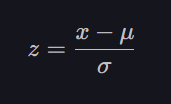

In [2]:
Image("standardizzazione.png")

### NumPy and scikit-learn
Per la maggior parte delle funzioni scikit-learn, i dati di input si presentano sotto forma di un `array NumPy`:
- Le righe dell'array rappresentano le singole osservazioni dei dati, 
- ogni colonna rappresenta una particolare caratteristica dei dati.

Il modulo di data preprocessing è chiamato `sklearn.preprocessing`. Una delle funzioni in questo modulo, `scale`, applica la standardizzazione dei dati di un deteterminato asse di una matrice NumPy.

In [6]:
## predefined pizza data
# Newline to separate print statements
# print('{}\n'.format(repr(pizza_data)))

In [7]:
## import del modulo scale
# from sklearn.preprocessing import scale

In [9]:
## Standardizing each column of pizza_data
# col_standardized = scale(pizza_data)
# print('{}\n'.format(repr(col_standardized)))

In [10]:
## Standardizing each column of pizza_data
# col_standardized = scale(pizza_data)
# print('{}\n'.format(repr(col_standardized)))

In [13]:
## Column means (rounded to nearest thousandth)
# col_means = col_standardized.mean(axis=0).round(decimals=3)
# print('{}\n'.format(repr(col_means)))

In [14]:
## Column standard deviations
# col_stds = col_standardized.std(axis=0)
# print('{}\n'.format(repr(col_stds)))

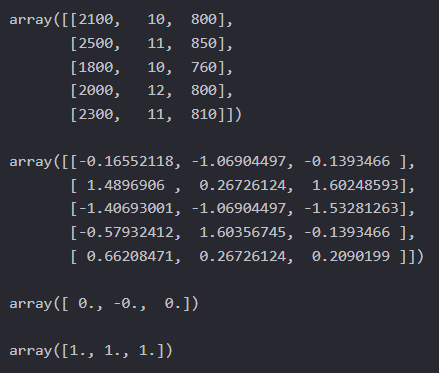

In [17]:
Image("scale_pizzadata.png")

In genere si standardizzano i dati in modo indipendente in ogni catteristica dell'array. In questo modo, si può vedere quanto la deviazione standard è il valore della caratteristica di una particolare osservazione dalla media.

Per esempio: la seconda osservazione di `pizza_data` ha un peso netto di 1,6 deviazione standard al di sopra del peso medio della pizza nel set di dati.

Se bisogna standardizzare i dati tra le righe, si può impostare l'argomento della keyword di `axis`, nella funzione `scale`, uguale a `1`. Questo potrebbe essere il caso di quando si analizzano i dati all'interno delle osservazioni, piuttosto che all'interno delle caratteristiche.

### Time to Code!
- setta `scaled_data` uguale a `scale` applicato con `data` come unico argomento.

In [18]:
def standardize_data(data):
    scaled_data = scale(data)
    return scaled_data

## Data Range
### Range scaling
Oltre standardizzare i dati, si possono anche ridimensionarli comprimendoli in un intervallo fisso. Uno dei maggiori casi d'uso è la compressione dei dati nell'intervallo `[0,1]` che permette di visualizzare i dati in termini di proporzioni, o percenutali.
<br><br>La formula per il ridimensionamento in base ad un intervallo è divisa in 2 fasi.
- per un dato valore di dati, `x`, si calcoli prima la proporzione del valore rispetto al min e al max dei dati.

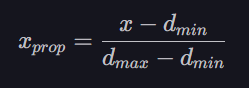

In [19]:
Image("ridimensionamento.png")

La formula sopra calcola la proporzione tra il valore dei dati. Questo funziona solo se non tutti i valori dei dati sono uguali: il valore massimo `non coincide` con il valore minimo.

Si usa quindi la proporzione del valore per scalare all'intervallo specificato, `[‎r‎Min‎, r‎Max‎‎]`. 
<br>La formula seguente calcola il nuovo valore scalato, `xscala`.



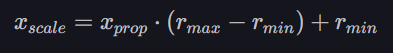

In [20]:
Image("ridimensionamento1.png")

## Range compression in scikit-learn
La libreria `scikit-learn` fornisce una varietà di trasformatori. Mentre nel capitolo precedente si è usato una singola funzione, `scale`, per eseguire la standardizzazione dei dati, i capitoli rimanenti si concentreranno sull'utilizzo di questi moduli trasformatori.
<br><br>Il modulo `MinMaxScaler` esegue la compressione dell'intervallo utilizzando la formula sopra. In particolare ridimensiona ogni colonnna dei dati in un determinato intervallo.
<br><br>L'oggeto `MinMaxScaler` contiene una funzine chiamata `fit_transform`, che permette di prendere in input un array di dati e poi di restituire dei dati ridimensionati. La funzione è una combinazione dell'oggetto `fit` e della funzione `transform`, dove il primo prende in un array di dati di input e il secondo trasforma un array in base ai dati dall'input alla funzione `fit`.

In [21]:
## predefined data
# print('{}\n'.format(repr(data)))

In [24]:
# from sklearn.preprocessing import MinMaxScaler
# default_scaler = MinMaxScaler() # the default range is [0,1]
# transformed = default_scaler.fit_transform(data)
# print('{}\n'.format(repr(transformed)))

In [31]:
# custom_scaler = MinMaxScaler(feature_range=(-2, 3))
# transformed = custom_scaler.fit_transform(data)
# print('{}\n'.format(repr(transformed)))

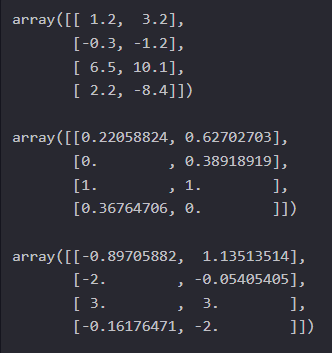

In [23]:
Image("MinMaxScaler.png")

Ora si runnino separatamente le funzioni `fit` e `transform` e le si comparino con la funzione `fit_transform`. `fit` prende in input un array e `transform` trasforma un array in base ai dati dall'input alla funzione fit.

In [26]:
## predefined new_data
# print('{}\n'.format(repr(new_data)))

In [27]:
# from sklearn.preprocessing import MinMaxScaler
# default_scaler = MinMaxScaler() # the default range is [0,1]
# transformed = default_scaler.fit_transform(new_data)
# print('{}\n'.format(repr(transformed)))

In [28]:
# default_scaler = MinMaxScaler()  # new instance
# default_scaler.fit(data)  # different data value fit
# transformed = default_scaler.transform(new_data)
# print('{}\n'.format(repr(transformed)))

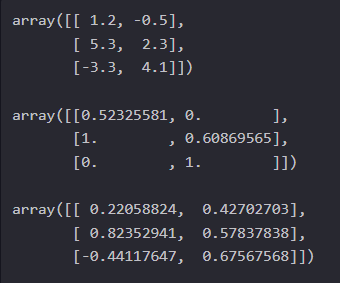

In [30]:
Image("fit_transform.png")

Il codice soprastante ridimensiona l'array `new_data` in un range [0,1] in base ai valori minimi e massimi (per colonna) della matrice `data` nell'esempio di codice originale.

### Time to Code!
- setta `min_max_scaler` uguale a `MinMaxScaler` inizializzato con `value_range` come argomento della keyword `feature_range`
- setta `scaled_data` uguale a `min_max_scaler.fit_transform` applicato a `data` come unico argomento.

In [32]:
def ranged_data(data, value_range):
    min_max_scaler = MinMaxScaler(feature_range=value_range)
    scaled_data = min_max_scaler.fit_transform(data)
    return scaled_data

## Robust Scaling
### Data outliers
Un aspetto importante dei dati con cui abbiamo a che fare sono i valori anomali. In termini generali, un outlier è un punto dati che è significativamente più lontano dagli altri punti dati. Ad esempio, se avessimo angurie di pesi 5, 4, 6, 7 e 20 libbre, l'anguria da 20 libbre sarebbe un'anomalia.
<br><br>I metodi di `ridimensionamento` visti in precendenza sono interessati da valori anomali. La standardizzazione dei dati utilizza la deviazione media e standard di ciascuna funzionalità, mentre il ridimensionamento a intervalli utilizza i valroi di funzionalità massima e minima, il che significa che entrambi sono suscettibili di essere distorti da valore anomali.
<br><br>Si può scalre in modo robusto i dati utilizzando la mediana e l'intervallo interquartile dei dati.
- Poichè la mediana e l'IQR sono misurazione percentili dei dati non sono influenzati da valori anomali.
- Per il metodo di ridimensionamento, si sottrae semplicemente la mediana da ciascun valore di dari, quindi si scala all'IQR.

### Robust scaling with scikit-learn
In scikit-learn, si performa un robusto ridimensionamento con il modulo `RobustScaler`. E' un altro oggetto trasformatore come `fit`, `transform` e `fit_transform`

In [33]:
## predefined data
# print('{}\n'.format(repr(data)))

In [35]:
# from sklearn.preprocessing import RobustScaler
# robust_scaler = RobustScaler()
# transformed = robust_scaler.fit_transform(data)
# print('{}\n'.format(repr(transformed)))

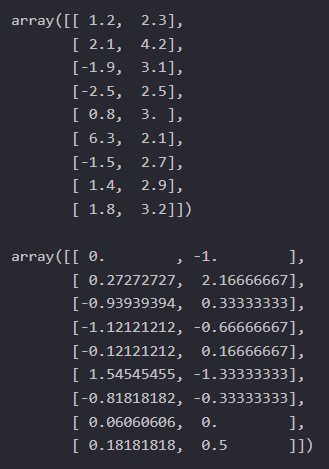

In [36]:
Image("RobustScaler.png")

### Time to Code!
- setta `robust_scaler` uguale a `RobustScaler` inizializzato senza parametri.
- setta `scaled_data` uguale a `robust_scaler.fit_transform` applicato con `data` come unico argomento.

In [37]:
def robust_scaling(data):
    robust_scaler = RobustScaler()
    scaled_data = robust_scaler.fit_transform(data)
    return scaled_data

## Normalizing Data
### L2 normalization
Finora, ciascuna delle tencniche di ridimensionamento che è stata utilizzata è stata applicata alle colonne. Quando si raggruppano i dati è necessario applicare la nomalizzazione L2  a ciascuuna riga, al fine di calcolare i punteggi di somiglianza del coseno. 
<br><br>La `normalizzazione L2` applicata a una particolare riga di una matrice di dati dividerà ogni valore in quella riga per la `norma L2` della riga. 
<br>In termini generali, la norma L2 di una riga è solo la radice quadrata della somma dei valori quadrati per la riga.

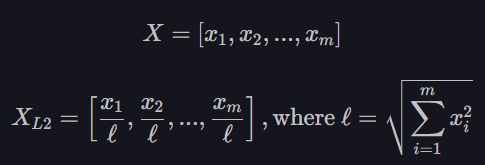

In [39]:
Image("normalizationl2.png")

Il codice soprastante dimmostra la normalizzazione L2 applicata alla riga `x` per ottendere la riga normalizzata di valori XL2.
<br><br>Il modulo traformatore che implementa la normalizzazione L2 è il `normalizer`. 

In [40]:
## predefined data
# print('{}\n'.format(repr(data)))

In [41]:
# from sklearn.preprocessing import Normalizer
# normalizer = Normalizer()
# transformed = normalizer.fit_transform(data)
# print('{}\n'.format(repr(transformed)))

### Time to Code!
- setta `normalizer` uguale a `Normalizer` inizializzato senza parametri.
- setta `norm_data` uguale a `normalizer.fit_transform` applicata con `data` come unico argomento.

In [42]:
def normalize_data(data):
    normalizer = Normalizer()
    norm_data = normalizer.fit_transform(data)
    return norm_data

## Data Imputation
### Data imputation methods
Nella vita reale, spesso si ha a che fare con dati che contengono valori mancanti. A volte, se al set di dati mancano troppi valori, semplicemente non lo si usa. Tuttavia se mancano solo alcuni dei valori, si può eseguire l'imputazione dei dati per sostituire i dati mancanti con altri valori.
<br><br>Esistono molti metodi per l'imputazione dei dati. In scikit-learn, il trasformatore `SimpleImpute` esegue 4 diversi metodi di imputazione dei dati.
I 4 metodi sono:
- utilizzo del valore medio
- utilizzo del valore mediano
- utilizzo del valore più frequente
- utilizzo dei valori mancanti con una costante

In [3]:
# from sklearn.impute import SimpleImputer
# imp_mean = SimpleImputer()
# transformed = imp_mean.fit_transform(data)
# print('{}\n'.format(repr(transformed)))

Rimpiazzamento con valore medio

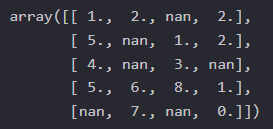

In [4]:
Image("dataimputation1.png")

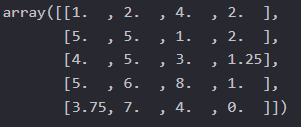

In [5]:
Image("dataimputation2.png")

Negli array di NumPy, i dati mancanti sono rappresentati da `np.nan`. Il rimpiazzamento di default del metodo `SimpleImputer` è usando la media della colonna. Usando la keyword `strategy` quando si inizializza un oggetto `SimpleImputer`, si può specificare un rimpiazzamento differente.

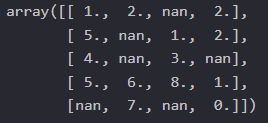

In [8]:
Image("dataimputation3.png")

In [9]:
# from sklearn.impute import SimpleImputer
# imp_median = SimpleImputer(strategy='median')
# transformed = imp_median.fit_transform(data)
# print('{}\n'.format(repr(transformed)))

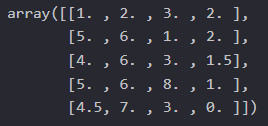

In [10]:
Image("dataimputation4.png")

In [11]:
# imp_frequent = SimpleImputer(strategy='most_frequent')
# transformed = imp_frequent.fit_transform(data)
# print('{}\n'.format(repr(transformed)))

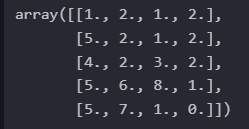

In [12]:
Image("dataimputation5.png")

Rimpiazzamento dei dati con una singola costante, in questo caso -1

In [13]:
# from sklearn.impute import SimpleImputer
# imp_constant = SimpleImputer(strategy='constant',
#                              fill_value=-1)
# transformed = imp_constant.fit_transform(data)
# print('{}\n'.format(repr(transformed)))

### Other imputation methods
L'oggeto `SimpleImpute` implementa solo i 4 metodi di imputazione mostrati sopra. Nonostante questo il rimpiazzamento dei dati non è limitato a questi 4 metodi.
<br><br>Ci sono anche metodi più avanzati come:
- `k-Nearest Neighbors` che riempe i valori mancanti su punteggi di somiglianza dall'algoritmo kNN
- MICE (applicazione di multipli rimpiazzamenti concatenati, supponendo che i valori mancanti siano distribuiti casualmente tra le osservazioni).

Nella maggior parte dei casi industriali questi metodi avanzati non sono necessari, poiché i dati sono perfettamente puliti o i valori mancanti sono scarsi. Tuttavia, i metodi avanzati potrebbero essere utili quando si tratta di set di dati open source, poiché questi tendono ad essere più incompleti.

## PCA
### Dimensionality reduction
La maggior parte dei set di dati contiene un gran numero di funzionalità, alcune delle quali sono ridondanti o non informative. 
- Ad esempio, in un set di dati di statistiche di pallacanestro, i punti totali e i punti per partita per un giocatore (il più delle volte) racconteranno la stessa storia sull'abilità di punteggio del giocatore.

Quando un set di dati contiene questi tipi di funzionalità numeriche correlate, è possibile eseguire **l'analisi pca** (Principal Component Analysis) per la riduzione della dimensionalità (ovvero la riduzione del numero di colonne nell'array di dati).
<br><br>
PCA estrae i componenti principali del set di dati, che sono un insieme non correlato di variabili latenti che comprendono la maggior parte delle informazioni dal set di dati originale. 
- L'utilizzo di un set più piccolo di componenti principali può rendere molto più semplice l'utilizzo del set di dati in modelli statistici o di apprendimento automatico (specialmente quando il set di dati originale contiene molte funzionalità correlate).

### PCA in scikit-learn
Come ogni trasformazione di dati, si può applicare PCA a un dataset in scikit-learn con un trasformatore, in questo caso il modulo `PCA`. Quando si inizializza il modulo PCA, si può usare la keyword `n_components` per specificare il numero di principali componenti, L'impostazione di default è estrarre m-1 componenenti principali, dove m è il numero di caratteristiche  nel dataset.

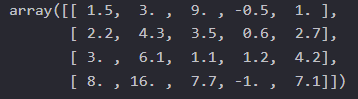

In [14]:
Image("pca.png")

In [15]:
# from sklearn.decomposition import PCA
# pca_obj = PCA() # The value of n_component will be 4. As m is 5 and default is always m-1
# pc = pca_obj.fit_transform(data).round(3)
# print('{}\n'.format(repr(pc)))

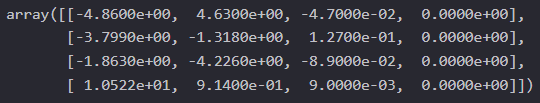

In [16]:
Image("pca1.png")

In [17]:
# pca_obj = PCA(n_components=3)
# pc = pca_obj.fit_transform(data).round(3)
# print('{}\n'.format(repr(pc)))

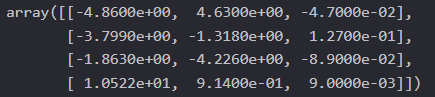

In [18]:
Image("pca2.png")

In [19]:
# pca_obj = PCA(n_components=2)
# pc = pca_obj.fit_transform(data).round(3)
# print('{}\n'.format(repr(pc)))

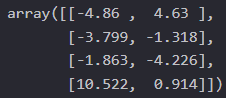

In [20]:
Image("pca3.png")

Si noti che quando PCA viene applicato con 4 componenti principali, la colonna finale (ultimo componente principale) ha solo 0. Ciò significa che in realtà ci sono solo un massimo di tre componenti principali non correlati che possono essere estratti.

### Time to Code!
- Setta `pca_obj` uguale a `PCA` inizializzato con l'argomento `n_components` per la keyword `n_components`.
- Setta `component_data` uguale a `pca_obj.fit_transform` applicato a `data` come unico argomento.

In [22]:
def pca_data(data, n_components):
    pca_obj = PCA(n_components=n_components)
    component_data = pca_obj.fit_transform(data)
    return component_data

## Labeled Data
### Class labels
Gran parte della data scientist è la classificazione delle osservazioni in un set di dati in categorie o classi separate.
<br>Un caso d'uso popolare della classificazione dei dati è la separazione di un set di dati in categorie "buone" e "cattive". Ad esempio, possiamo classificare un set di dati di tumori al seno come maligni o benigni.‎

In [23]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
print('{}\n'.format(repr(bc.data)))
print('Data shape: {}\n'.format(bc.data.shape))

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Data shape: (569, 30)



In [24]:
# Class labels
print('{}\n'.format(repr(bc.target)))
print('Labels shape: {}\n'.format(bc.target.shape))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [25]:
# Label names
print('{}\n'.format(list(bc.target_names)))

malignant = bc.data[bc.target == 0]
print('Malignant shape: {}\n'.format(malignant.shape))

benign = bc.data[bc.target == 1]
print('Benign shape: {}\n'.format(benign.shape))

['malignant', 'benign']

Malignant shape: (212, 30)

Benign shape: (357, 30)



- L'array `bc.data` contiene tutti i valori del dataset,
- mentre l'array `bc.target` contiene le etichette per ogni riga di ``bc.data`. 

0 corrisponde a un tumore maligno, mentre 1 corrisponde a un tumore benigno.
<br><br>
Usando gli id di classe di `bc.target`, il dataset è stato separato in array maligni e benigni.

### Time to Code!
L'esercizio in questo capitolo prevede il completamento della funzione che separerà i dati dei componenti principali per classe.
<br>Prima bisogna creare una funzione `get_label_info`, che ritorni il nome dell'etichetta e dati per ogni classe di etichetta.
- `component_data` rappresenta i principali componenti dati,
- `labels` è un array 1-D contenente l'etichetta di classe corrispondente per ogni riga di `component_data`. Si può usare per separare i principali componenti per classe,
- `class_label` rappresenta una particolare etichetta di classe,
- `label_names` rappresenta tutte i nomi delle strighe per ogni etichetta di classe.
<br><br>
- Setta `label_name` uguale alla stringa in corrispondenza dell'indice `class_label` di `label_names`.
- Setta `label_data` uguale alle righe di `component_data` corrispondente agli indici dove `labels` è uguale a `class_label`. Ritorna la tupla `label_name, label_data`.

In [3]:
def get_label_info(component_data, labels,
                   class_label, label_names):

    label_name = label_names[class_label]
    label_data = component_data[labels == class_label]
    return (label_name, label_data)

Ora, dentro la funzione principale `separated_data`, si itererà attraverso ogni etichetta della lista `label_names`.
- Setta `separated_data` uguale a una lista vuota.
- Crea un `for` loop che itereri la variabile `class_label` attraverso il `range(len(label_names)).`

Dentro al `for` loop, si usi la funzione di support per ottenere i dati separati per ogni classe.
- Dentro il `for` loop, chiamare `get_label_info` con input `component_data`, `labes`, `class_labes` e `labes_names`. Aggiungere l'output della funzione a `separated_data.`

Dopo aver finalizzato l'elenco dei componenti principali separati per classe, lo si restituisce.
- alla fine del ciclo for si restituisca `separated_data`

In [4]:
def separate_data(component_data, labels,
                  label_names):
    
    separated_data = []
    for class_label in range(len(label_names)):
        separated_data.append(get_label_info(component_data, 
                                             labels, 
                                             class_label, 
                                             label_names))
    return separated_data

La funzione `separate_data` è incredibilmente utile per visualizzare le componenti. Si pul usare `matplotlib` per creare buoni grafici di dati separati.

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

bc = load_breast_cancer()
pca_obj = PCA(n_components=2)
component_data = pca_obj.fit_transform(bc.data)
labels = bc.target
label_names = bc.target_names

# Using the completed separate_data function
separated_data = separate_data(component_data,
                               labels, 
                               label_names)

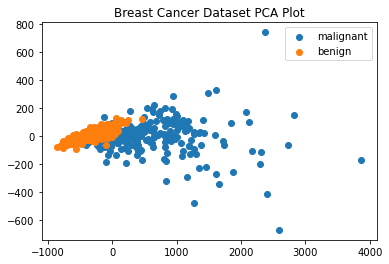

In [8]:
# Plotting the data
import matplotlib.pyplot as plt
for label_name, label_data in separated_data:
    col1 = label_data[:, 0]  # 1st column (1st pr. comp.)
    col2 = label_data[:, 1]  # 2nd column (2nd pr. comp.)
    
    plt.scatter(col1, col2, label=label_name) # scatterplot

plt.legend()  # adds legend to plot
plt.title('Breast Cancer Dataset PCA Plot')
plt.show()